# Библиотека __atmons__

### Установим всё необходимое

In [13]:
! pip install git+https://github.com/arikallis-j/ns-atmospheres.git#egg=atmons
! $spectra = "https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/heads/main/spectra"
! $configs = "https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/heads/main/configs"
! wget --directory-prefix="spectra" -N $spectra/spec_ph.yml $spectra/fcol_He.dat $spectra/fcol_S1.dat $spectra/fcol_S001.dat
! wget --directory-prefix="configs" -N $configs/__config__.yml  $configs/__grid__.yml

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/arikallis-j/ns-atmospheres.git to /tmp/pip-install-zqn0638v/atmons_3de8cc5cc2b24eedb868141e3ac1550e
  Running command git clone --filter=blob:none --quiet https://github.com/arikallis-j/ns-atmospheres.git /tmp/pip-install-zqn0638v/atmons_3de8cc5cc2b24eedb868141e3ac1550e
  Resolved https://github.com/arikallis-j/ns-atmospheres.git to commit b76a6d73b44fabb516fbbf1580e2cb960e223de0
  Preparing metadata (setup.py) ... done
fish: Unknown command: https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/heads/main/spectra/
fish: 
 https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/heads/main/spectra/ = "https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/heads/main/spectra"
 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^
fish: Unknown command: https://raw.githubusercontent.com/arikallis-j/ns-atmospheres/refs/h

### Импорт библиотек

In [14]:
from atmons import *
import matplotlib.pyplot as plt

## Пример

In [ ]:
config, grid = loader()
config['spec_key'] = 'wfc'
config['chem'] = 'he' 

grid['n_nu'] = 500
grid['n_theta'] = 10
grid['n_phi'] = 10

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()

for shot in burst:
    if True: break


{'n_model': 23,
 'flux': <Quantity [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
            [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]]>,
 'Flux': <Quantity 2.60897675e+24 erg / (s cm2)>,
 'T_eff': <Quantity [[14693903.34127067, 14515459.17162244, 14204256.79525378,
             13850185.04499192, 13571712.31879235, 13571712.31879235,
             13850185.04499192, 14204256.79525378, 14515459.17162244,
             14693903.34127067],
            [14693903.34127067, 

### Поток по новой интерполяции

In [ ]:
config, grid = loader()
config['spec_key'] = 'be'
config['chem'] = 's1'
config['flux_key'] = 1

grid['n_nu'] = 500
grid['n_theta'] = 5
grid['n_phi'] = 5

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum = []

# print(ns.surface.theta_init)
# print(ns.surface.phi_init)
# print(ns.param.V_kep/ns.param.R_eq/2/PI)
print(ns.surface.G_eff)
print(ns.surface.Doppler)
# print(ns.surface.E_dop[0,4,:])
for shot in burst:
    # if counter==1:
    #     print(f"{shot.flux_real}")
    #     print(f"{np.sum(shot.flux_real , axis=(0,1)) / 2}")
    #     print(f"{shot.lum}")
    #     print(f"{shot.lum_eff}")
    #     print(f"{shot.lamda_eff}")
    #     break
    # print(f"{counter:<3}| {shot.lum:.6f} | {shot.Epsilon_eff:.6f} | {shot.fc:.6f} | {shot.w:.6f} ")
    print(f"{counter:<3}| {shot.lum:.6f} | {shot.lum_eff:.6f} | {shot.lamda_eff:.6f}")

    counter += 1

# Спектр для случая fig.7b

## Два стандартных графика

1  | 0.091090 | 0.097617
w, fc = (0.33743414579200004, 1.29194242816)
w_eff, fc_eff = (0.3949593978880001, 1.2650738585600003)
1  | 0.092886 | 0.099532
w, fc = (0.35401722368000005, 1.2787846502400004)
w_eff, fc_eff = (0.41593386496000007, 1.2506587520000003)


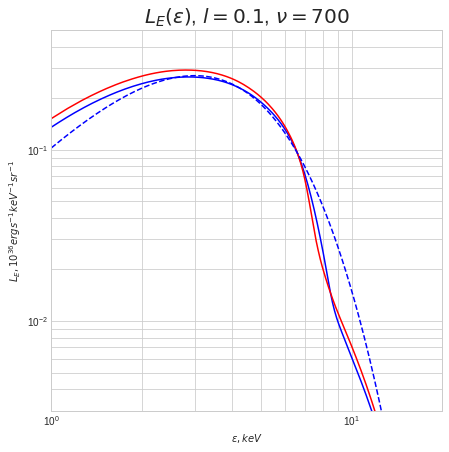

In [2]:
plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$L_E(\\varepsilon)$, $l=0.1$, $\\nu = 700$", loc='center', fontsize=20)
ax.set_xlabel("$\\varepsilon, keV$")
ax.set_ylabel("$L_E, 10^{36} erg s^{-1} keV^{-1} sr^{-1} $")

# lum = 0.9
# ax.set_ylim(0.09, 2)
# ax.set_xlim(1.0, 20)

lum = 0.1
ax.set_ylim(0.003, 0.5)
ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')

config, grid = loader()
config['w_func'] = 'power-n'
config['th_star'] = 60.0
config['w_par'] = 3/2 + 1/10

config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 30
grid['n_phi'] = 30
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 45 # 45 #  89.99
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
cos_sig = ns.surface.cos_sig
counter = 1
Lum = []
#print(ns.surface.G_eff)
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f} | {shot.lum_eff:.6f}")
    if FLUX_REL[counter-1] == lum:
        #print(shot.flux_eff)
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, color='blue')
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_eff_real/shot.B_eff_real.unit/10**36, color='red')
        print(f"w, fc = {shot.w, shot.fc}")
        print(f"w_eff, fc_eff = {shot.w_eff, shot.fc_eff}")
        #print(np.round(shot.flux_real/np.max(shot.flux_real), decimals=2))
        #print(np.round(shot.flux_real.T/np.max(shot.flux_real), decimals=2))
        break
    counter += 1


config, grid = loader("paper")
config['spec_key'] = 'wfc'

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum = []
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f} | {shot.lum_eff:.6f}")
    if FLUX_REL[counter-1] == lum:
        print(f"w, fc = {shot.w, shot.fc}")
        print(f"w_eff, fc_eff = {shot.w_eff, shot.fc_eff}")
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, linestyle='dashed', color='blue')
        #ax.loglog(shot.E_null/shot.E_null.unit, shot.B_eff_real/shot.B_eff_real.unit/10**36, linestyle='dashed', color='red')
        break
    counter += 1


plt.savefig('graph/' + "fig_7b" + "_700hz" + "_0.1" + '.pdf')


## Два графика + итог интерполяции

In [ ]:
plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$L_E(\\varepsilon)$, $l=0.1$, $\\nu = 700$, $chem = s1$, $i = 90$", loc='center', fontsize=20)
ax.set_xlabel("$\\varepsilon, keV$")
ax.set_ylabel("$L_E, 10^{36} erg s^{-1} keV^{-1} sr^{-1} $")

# lum = 0.9
# ax.set_ylim(0.09, 2)
# ax.set_xlim(1.0, 20)

lum = 0.1
ax.set_ylim(0.003, 0.5)
ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')

config, grid = loader()
config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 30
grid['n_phi'] = 30
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 0 # 90
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
shoter = ns._shot
counter = 1
Lum = []
for k in range(1,23):
    print(f"{counter:<3}| {FLUX_REL[counter-1]:.6f}")
    if FLUX_REL[counter-1] == lum:
        shot = shoter(counter-1)
        w, f_c, T, area = shot.w, shot.fc, shot.Epsilon_eff, shot.area_real
        С = rho_rad(shot.E_null, T*f_c, w) * area
        ax.loglog(shot.E_null/shot.E_null.unit, С/С.unit/10**36, color='red')
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, color='blue')
        break
    counter += 1


config, grid = loader("paper")
config['spec_key'] = 'wfc'

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
shoter = ns._shot
counter = 1
Lum = []
for k in range(1,23):
    print(f"{counter:<3}| {FLUX_REL[counter-1]:.6f}")
    if FLUX_REL[counter-1] == lum:
        shot = shoter(counter-1)
        w, f_c, T, area = shot.w, shot.fc, shot.Epsilon_eff, shot.area_real
        С = rho_rad(shot.E_null, T*f_c, w) * area
        ax.loglog(shot.E_null/shot.E_null.unit, С/С.unit/10**36, linestyle='dashed', color='red')
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, linestyle='dashed', color='blue')
        break
    counter += 1


plt.savefig('graph/' + "surf" + "_0.1lum" + "_700hz" + "_s1" + '.pdf')

## Коэффециенты интерполяции

In [ ]:
plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$F(\\theta)/F_{Edd}(\\theta) = const$, $\\nu = 0$, $chem = he$", loc='center', fontsize=20)
ax.set_xlabel("$L(\\nu_{\\star}, i) / L_{Edd}(0)$")
ax.set_ylabel("Colour correction factor $f_c'$")


# lum = 0.9
# ax.set_ylim(0.09, 2)
# ax.set_xlim(1.0, 20)

# lum = 0.1
# ax.set_ylim(0.003, 0.5)
# ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')

config, grid = loader()
config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 15
grid['n_phi'] = 15
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 0 # 90 
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

ns_1 = NeurtonStar(config,grid)
burst = ns_1.burst()
counter = 1
Lum, F_c = [], []
for shot in burst:
    print(f"{counter:<3}| {shot.lum_eff:.6f}")
    F_c.append(shot.fc_eff)
    Lum.append(shot.lum_eff)
    counter += 1

ax.plot(Lum, F_c, color='blue')

config, grid = loader("paper")
config['spec_key'] = 'be'

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum, F_c = [], []
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    F_c.append(shot.fc)
    Lum.append(shot.lum)
    counter += 1

ax.plot(Lum, F_c, color='red')

plt.savefig('graph/' + "surf_fc" + "_0hz" + "_he" + '.pdf')

In [ ]:
config, grid = loader()
# config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 30
grid['n_phi'] = 60
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 0 # 45 # 90 
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$L_E(\\varepsilon)$, $l = 0.1$", loc='center', fontsize=20)
ax.set_xlabel("$\\varepsilon, keV$")
ax.set_ylabel("$L_E, 10^{36} erg s^{-1} keV^{-1} sr^{-1} $")

# lum = 0.9
# ax.set_ylim(0.09, 2)
# ax.set_xlim(1.0, 20)

lum = 0.1
ax.set_ylim(0.003, 1)
ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')
ns = NeurtonStar(config,grid)
burst = ns.burst()

log_g = ns.param.log_g
lum = 0.1
E = ns.surface.E[0:1:,0:1:,:]

Lum = np.full((1,1), lum)
Log_G = np.full((1,1), log_g)
B = B_inter(Lum, Log_G, E, 's1') * ns.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, B[0,0,:]/B.unit/10**36, color='blue')

wwf_T, tcf_T = wwf_tcf_T(ns.param.T_c, ns.param.w_b, Lum, Log_G)

С = rho_rad(E[0,0,:], tcf_T, wwf_T)  *ns.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, С[0,:]/С.unit/10**36, linestyle='dashed', color='blue')

config, grid = loader("paper")
config['i_ang'] = 90 
dumper('paper', config, grid)
config, grid = loader("paper")

ns_1 = NeurtonStar(config,grid)
burst = ns_1.burst()

log_g = ns_1.param.log_g
lum = 0.1
E = ns_1.surface.E[0:1:,0:1:,:]

Lum = np.full((1,1), lum)
Log_G = np.full((1,1), log_g)
B = B_inter(Lum, Log_G, E, 's1') * ns_1.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, B[0,0,:]/B.unit/10**36, color='blue')

wwf_T, tcf_T = wwf_tcf_T(ns_1.param.T_c, ns_1.param.w_b, Lum, Log_G)

С = rho_rad(E[0,0,:], tcf_T, wwf_T) * ns_1.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, С[0,:]/С.unit/10**36, linestyle='dashed', color='blue')




plt.savefig('graph/' + "fig_7b" + "_0.1" + '.pdf')

In [ ]:
config, grid = loader()
# config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 30
grid['n_phi'] = 60
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 0 # 45 # 90 
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$L_E(\\varepsilon)$, $l = 0.9$", loc='center', fontsize=20)
ax.set_xlabel("$\\varepsilon, keV$")
ax.set_ylabel("$L_E, 10^{36} erg s^{-1} keV^{-1} sr^{-1} $")

lum = 0.9
ax.set_ylim(0.09, 3)
ax.set_xlim(1.0, 20)

# lum = 0.1
# ax.set_ylim(0.003, 0.5)
# ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')
ns = NeurtonStar(config,grid)
burst = ns.burst()

log_g = ns.param.log_g
lum = 0.9
E = ns.surface.E[0:1:,0:1:,:]

Lum = np.full((1,1), lum)
Log_G = np.full((1,1), log_g)
B = B_inter(Lum, Log_G, E, 's1') * ns.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, B[0,0,:]/B.unit/10**36, color='blue')

wwf_T, tcf_T = wwf_tcf_T(ns.param.T_c, ns.param.w_b, Lum, Log_G)

С = rho_rad(E[0,0,:], tcf_T, wwf_T)  *ns.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, С[0,:]/С.unit/10**36, linestyle='dashed', color='blue')

config, grid = loader("paper")
config['i_ang'] = 90 
dumper('paper', config, grid)
config, grid = loader("paper")

ns_1 = NeurtonStar(config,grid)
burst = ns_1.burst()

log_g = ns_1.param.log_g
lum = 0.9
E = ns_1.surface.E[0:1:,0:1:,:]

Lum = np.full((1,1), lum)
Log_G = np.full((1,1), log_g)
B = B_inter(Lum, Log_G, E, 's1') * ns_1.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, B[0,0,:]/B.unit/10**36, color='blue')

wwf_T, tcf_T = wwf_tcf_T(ns_1.param.T_c, ns_1.param.w_b, Lum, Log_G)

С = rho_rad(E[0,0,:], tcf_T, wwf_T)  *ns_1.param.area_0 * PI

ax.loglog(E[0,0,:]/E.unit, С[0,:]/С.unit/10**36, linestyle='dashed', color='blue')



plt.savefig('graph/' + "fig_7b" + "_0.9" + '.pdf')

In [ ]:
# burst = ns.burst()
# counter = 1
# Lum = []
# plt.style.use('seaborn-whitegrid')
# for shot in burst:
#     print(f"{counter:<3}| {shot.lum:.6f}")
#     plt.plot(log(shot.E_null/shot.E_null.unit), log(shot.B_real/shot.B_real.unit) - 36,)
#     counter += 1

In [ ]:
dshot = shot._output()
for key in dshot:
    if str(type(dshot[key])) != "<class 'function'>" and str(type(dshot[key])) != "<class 'tuple'>" and str(type(dshot[key])) != "<class 'int'>" :
        if str(type(dshot[key])) != "<class 'numpy.ndarray'>" and str(type(dshot[key])) != "<class 'numpy.float64'>":
            print(f"{key}: {dshot[key].unit}")
        # if str(type(dshot[key])) == "<class 'numpy.ndarray'>":
        #     print(f"{key}: {type(dshot[key])}")

In [ ]:
print(dshot['fc'])

In [ ]:
dsurf = surf._output()
for key in dsurf:
    if str(type(dsurf[key])) != "<class 'function'>" and str(type(dsurf[key])) != "<class 'tuple'>":
        if str(type(dsurf[key])) != "<class 'numpy.ndarray'>":
            print(f"{key}: {dsurf[key].unit}", end=" | ")
        # if str(type(dsurf[key])) == "<class 'numpy.ndarray'>":
        #     print(f"{key}: {type(dsurf[key])}")

In [ ]:
print(dsurf['dOmega_E'])
# self.theta, self.cos_eta, self.R, N_ph, N_th, self.ph_range, self.th_range

In [ ]:
dns = par._output()
for key in dns:
    if str(type(dns[key])) != "<class 'function'>" and str(type(dns[key])) != "<class 'tuple'>":
        print(f"{key}: {dns[key].unit}", end=" | ")

In [ ]:
import astropy.units as u 
# create units
speed = 15 * u.m / u.s  
print(speed)

# dimensionality of units
print(speed.unit)
# value of units
print(speed.value)

# array of units
L = np.array([1, 2, 3]) * u.m 
print(L)

# object contructor
v_0 = u.Quantity(20, u.m / u.s) 
u_0 = u.Quantity('15 m/s')
print(v_0 + u_0)

# translation to other systems
q = 2.4 * u.m / u.s 
# to specific units
print(q.to(u.km / u.h))
# to SI
print(q.si)
# to CGS
print(q.cgs)

# simplifing units
kappa = 20. * u.cm / (1. * u.m)
print(kappa.decompose())

# angle units
q = 30. * u.deg
import numpy as np
print(np.sin(q))

from astropy.constants import h, k_B, c
nu = 3 * u.GHz
T = 30 * u.K
print(np.exp(-h * nu / (k_B * T)))


a = np.arange(5.)
print(a)
b = a << u.m
print(b)
a <<= u.m
print(a)

v_1 = 0.5 * c
print(v_1.to(u.cds.c))

In [ ]:
config, grid = loader()
# config['spec_key'] = 'be'
# config['spec_key'] = 'wfc'
grid['n_nu'] = 500
grid['n_theta'] = 6
grid['n_phi'] = 12

dumper('paper', config, grid)
config, grid = loader("paper")

In [ ]:
ns = NeurtonStar(config, grid)

In [ ]:
burst = ns.burst()
counter = 1
Lum = []
plt.style.use('seaborn-whitegrid')
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    plt.plot(log(shot.E_null), log(shot.B_real) - 36,)
    counter += 1


In [ ]:
burst = ns.burst()
counter = 1
Lum_r, Fc_r, W_r = [], [], []

for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    Lum_r.append(shot.lum)
    Fc_r.append(shot.fc)
    W_r.append(shot.w)
    counter += 1

In [ ]:
print(0.7658143407933556/1.032319186017881)

In [ ]:
burst = ns.burst()
counter = 1
Lum, Fc, W = [], [], []

for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    Lum.append(shot.lum)
    Fc.append(shot.fc)
    W.append(shot.w)
    counter += 1

In [ ]:
print(Lum)
print(W)
plt.plot(Lum, W)

In [ ]:
print(Lum)
print(Fc)
plt.plot(Lum, Fc)

In [ ]:
print(Lum_r)
print(Fc_r)
plt.plot(Lum_r, Fc_r)

In [ ]:
plt.style.available

TODO:
- Проверить границы E и dE
- Понять, почему поток такой маленький
- Возможно раскидать по файлам оригинальные спектры
(походу слишком долго читается)